In [31]:
import MLP
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Get data, 所有数据的第0号作为训练数据，其余作为测试数据

In [32]:
data = np.load('./databygroup.npy',allow_pickle=True).tolist()
TrainData,TestData={},{}
for k in data.keys():
    if '.csv0' in k:
        TrainData[k]=data[k]
    else:
        TestData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
xtem,ytem=[],[]
for k in TrainData.keys():
    xtem.append(TrainData[k][:,1:TrainData[k].shape[1]-4])
    ytem.append(TrainData[k][:,[-4,-3,-2,-1]])
x = Variable(torch.FloatTensor(np.concatenate(xtem, axis=0).tolist()))
y = Variable(torch.FloatTensor(np.concatenate(ytem, axis=0).tolist()))

# MLP

## 训练

MLP(
  (model): Sequential(
    (input): Linear(in_features=64, out_features=100, bias=True)
    (h1): Linear(in_features=100, out_features=100, bias=True)
    (h2): Linear(in_features=100, out_features=100, bias=True)
    (output): Linear(in_features=100, out_features=4, bias=True)
  )
)
tensor(0.5415, grad_fn=<MseLossBackward0>)
tensor(0.0010, grad_fn=<MseLossBackward0>)
tensor(0.0009, grad_fn=<MseLossBackward0>)
tensor(0.0008, grad_fn=<MseLossBackward0>)
tensor(0.0008, grad_fn=<MseLossBackward0>)


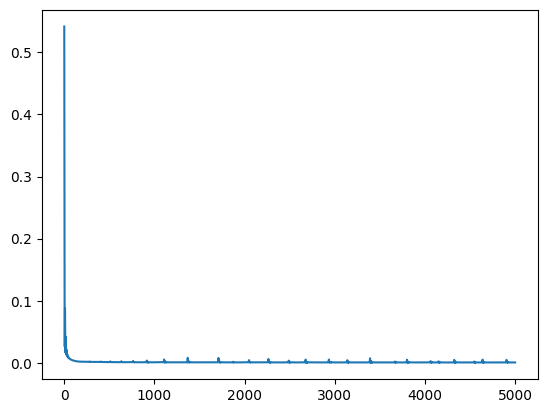

In [33]:
param={
    'inputsize':x.shape[1],
    'outputsize':y.shape[1],
    'layers':[100,100,100],
    'act':['relu','relu','relu','relu','tanh'],
    'learning_rate':0.001,
    'opt':'Adam',
}
train=True
initial_train=True
net = MLP.MLP(param)
print(net)

if train:
    if not initial_train:
        net=torch.load('./model/MLP')
    optimizer = torch.optim.Adam(net.parameters(),lr = param['learning_rate'])
    loss_func = torch.nn.MSELoss()
    mse=[]
    for t in range(5000):
        prediction = net(x)
        loss = loss_func(prediction,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mse.append(loss.detach().numpy())
        if t%1000 ==0:
            print(loss)
    plt.plot(mse)
    torch.save(net.model,'./model/MLP')
else:
    net=torch.load('./model/MLP')

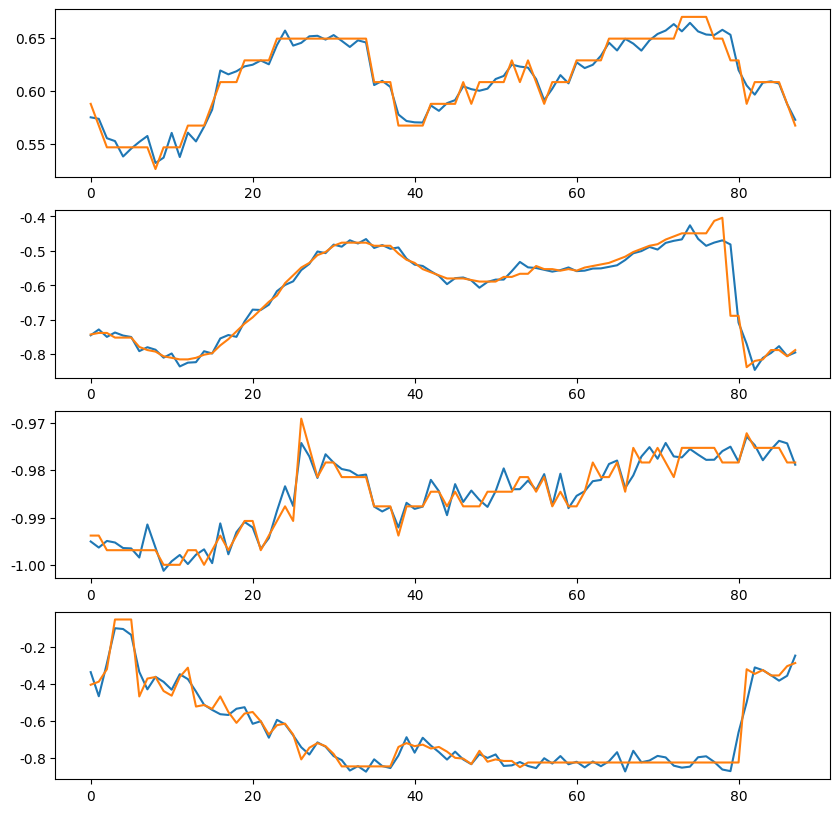

In [34]:
yp = net(x)
fig,ax=plt.subplots(4,1,figsize=(10,10))
for i in range(4):
    ax[i].plot(yp.detach().numpy()[:,i])
    ax[i].plot(y.detach().numpy()[:,i])
    

## 测试

In [35]:
for f in TestData.keys():
    y1 = Variable(torch.FloatTensor(TestData[f][:,[-4,-3,-2,-1]].tolist()))
    x1 = Variable(torch.FloatTensor(TestData[f][:,1:TestData[f].shape[1]-4].tolist()))
    print(x1.shape)
    yp = net(x1)
    #mse = np.sqrt(np.mean(np.square(y1.detach().numpy()-yp.detach().numpy())))
    pd.DataFrame(yp.detach().numpy()).to_csv('./results/MLP/results_'+f)
    os.chdir(os.path.pardir)
    print(os.getcwd())
    pd.DataFrame(yp.detach().numpy()).to_csv('./Step4_Compare/results_p/MLP/results_'+f)
    os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step3_DNN')


torch.Size([231, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([178, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([257, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([445, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([509, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([875, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([532, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([478, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([922, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([55, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([524, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([313, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([342, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([88, 64])
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([384, 64])
/Users/tianwenchong/Desktop/